True vs. Estimated:
a: true=1.000000  est=1.093818
b: true=0.100000  est=0.161266
c: true=1.500000  est=0.574391
d: true=0.075000  est=0.037388


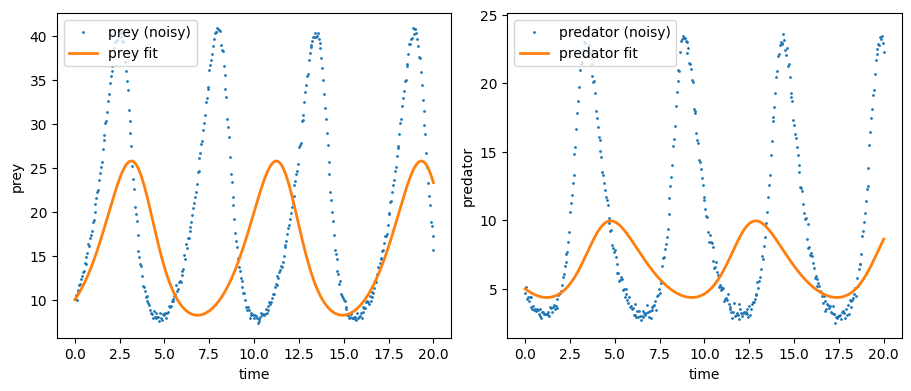

In [3]:

import numpy as np
from dataclasses import dataclass
from scipy.integrate import solve_ivp
from scipy.optimize import least_squares
import matplotlib.pyplot as plt

# Lotka–Volterra (prey x, predator y):
# dx/dt =  a*x - b*x*y
# dy/dt = -c*y + d*x*y
# a = prey pop growth rate
# b = prey death rate
# c = predator death rate
# d = predator population growth rate
def lv(t, z, a, b, c, d):
    x, y = z
    return [a*x - b*x*y, -c*y + d*x*y]

@dataclass
class SimSpec:
    t0: float = 0.0 #start time
    t1: float = 20.0 #end time 
    n: int = 401 # numb of data points
    x0: float = 10.0   # initial prey
    y0: float = 5.0    # initial predators
    sigma: float = 0.3 # additive Gaussian noise SD

#synthetic data
true_params = np.array([1.0, 0.1, 1.5, 0.075])  #(a, b, c, d)
spec = SimSpec()
t_eval = np.linspace(spec.t0, spec.t1, spec.n)

sol_true = solve_ivp(  #ode solver
    #z'(t) = f(t, z(t)) - integrates the system of odes at time t
    lambda t, z: lv(t, z, *true_params), 
    # this is gets the values of pred and prey at time t, unpacks true param into lv (a,b,c,d)
    (spec.t0, spec.t1), #start and end time 
    [spec.x0, spec.y0], #start populations for pred and prey 
    t_eval=t_eval,
    rtol=1e-8, # relative tolerance (controls proportional accuracy)
     atol=1e-10 # absolute tolerance (controls floor of accuracy for tiny numbers)
)

rng = np.random.default_rng(42)
Y_clean = sol_true.y.T                            # shape (401, 2)
Y_noisy = Y_clean + spec.sigma * rng.standard_normal(Y_clean.shape)  #generating noisy dataset

#2) Define loss and refit parameters

#now that we have created the synthic data we now will try to imagine we don't know the pararmeters, 
#and will try to make guess what the parameters are.
def simulate(params):
    a, b, c, d = params
    sol = solve_ivp(
        lambda t, z: lv(t, z, a, b, c, d), #guessing parameters
        (spec.t0, spec.t1),  #time
        [spec.x0, spec.y0],  #intial conditions
        t_eval=t_eval,
        rtol=1e-6, atol=1e-8
    )
    return sol.y.T  # (401, 2)

# Residuals (stack prey and predator residuals)
def residuals(theta_log):
    theta = np.exp(theta_log)
    Y_hat = simulate(theta) #run model with guessing parameters
    return (Y_hat - Y_noisy).ravel() #difference between guess and simulated data

theta0 = np.log(np.array([0.8, 0.08, 1.2, 0.05]))  # rough initial guess
res = least_squares(residuals, theta0, method="trf", ftol=1e-10, xtol=1e-10, gtol=1e-10, max_nfev=200) # optimizer
#continuously runs until we find a values for parameters that minimize the resiudal beteween simulated and guessing data


est_params = np.exp(res.x)
names = ["a", "b", "c", "d"]
print("True vs. Estimated:")
for n, t, e in zip(names, true_params, est_params):
    print(f"{n}: true={t:.6f}  est={e:.6f}")

# Plot
Y_fit = simulate(est_params)
fig, ax = plt.subplots(1, 2, figsize=(9, 3.8), constrained_layout=True)
ax[0].plot(t_eval, Y_noisy[:,0], ".", ms=2, label="prey (noisy)")
ax[0].plot(t_eval, Y_fit[:,0], "-", lw=2, label="prey fit")
ax[0].set_xlabel("time"); ax[0].set_ylabel("prey"); ax[0].legend()

ax[1].plot(t_eval, Y_noisy[:,1], ".", ms=2, label="predator (noisy)")
ax[1].plot(t_eval, Y_fit[:,1], "-", lw=2, label="predator fit")
ax[1].set_xlabel("time"); ax[1].set_ylabel("predator"); ax[1].legend()

plt.show()


In [ ]:
import numpy as np
from dataclasses import dataclass
from scipy.integrate import solve_ivp
from scipy.optimize import least_squares
import matplotlib.pyplot as plt

def lv(t,z,a,b,c,d):
    x,y = z
    return  [a*x - b*x*y, -c*y + d*x*y]

@dataclass
class Simulated_data:
    x0: float = 5.0
    y0: float = 3.0
    t0: float = 0.0
    t1: float = 20.0
    n: int =  400
    sigma: float = 0.3

true_params = np.array([1.0, 0.5, 2.0, 0.5])
spec = Simulated_data()
t_eval = np.linspace(spec.t0, spec.t1, spec.n)

obs_data = solve_ivp(
    lambda t, z: lv(t, z, *true_params), 
    (spec.t0, spec.t1),
    [spec.x0, spec.y0],
    t_eval=t_eval,
     rtol=1e-6, atol=1e-8
)
return 
    
    


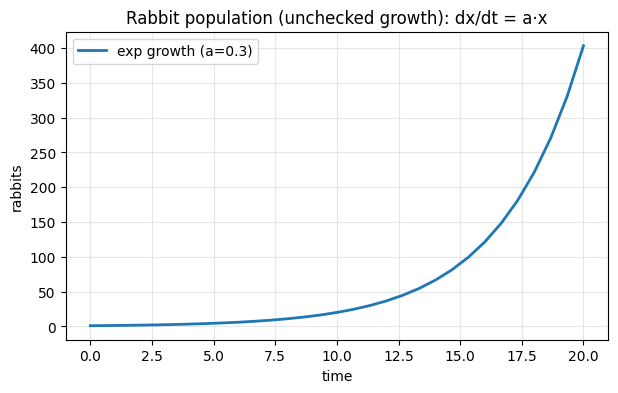

In [17]:
import numpy as np
from dataclasses import dataclass
from scipy.integrate import solve_ivp
from scipy.optimize import least_squares
import matplotlib.pyplot as plt

def rabbits(t,x,a):
    return x*a
@dataclass 
class SimulateData:
    t0: float = 0.0
    t1: float = 20.0
    n: int = 30
    x0: int = 1

a = 0.3
spec = SimulateData()
t_eval = np.linspace(spec.t0, spec.t1, spec.n + 1)

sol = solve_ivp(
    fun=lambda t, x: rabbits(t, x, a),  # corrected
    t_span=(spec.t0, spec.t1),
    y0=[spec.x0],
    t_eval=t_eval,
    rtol=1e-8,
    atol=1e-10,
)

x = sol.y[0]

plt.figure(figsize=(7, 4))
plt.plot(t_eval, x, lw=2, label=f"exp growth (a={a})")
plt.xlabel("time")
plt.ylabel("rabbits")
plt.title("Rabbit population (unchecked growth): dx/dt = a·x")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

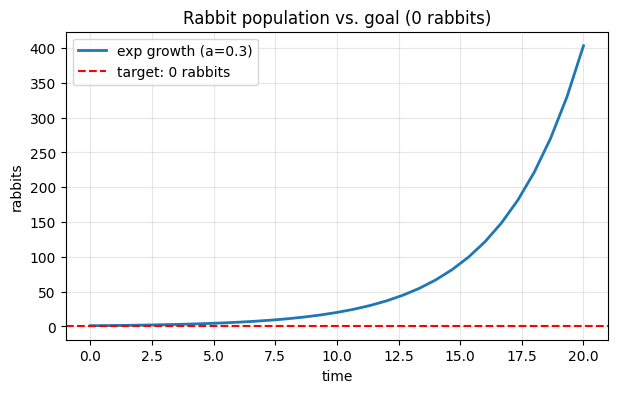

In [18]:
# Plot solution + target line (zero rabbits)
plt.figure(figsize=(7,4))
plt.plot(t_eval, x, lw=2, label=f"exp growth (a={a})")
plt.axhline(0, color="red", linestyle="--", label="target: 0 rabbits")
plt.xlabel("time")
plt.ylabel("rabbits")
plt.title("Rabbit population vs. goal (0 rabbits)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


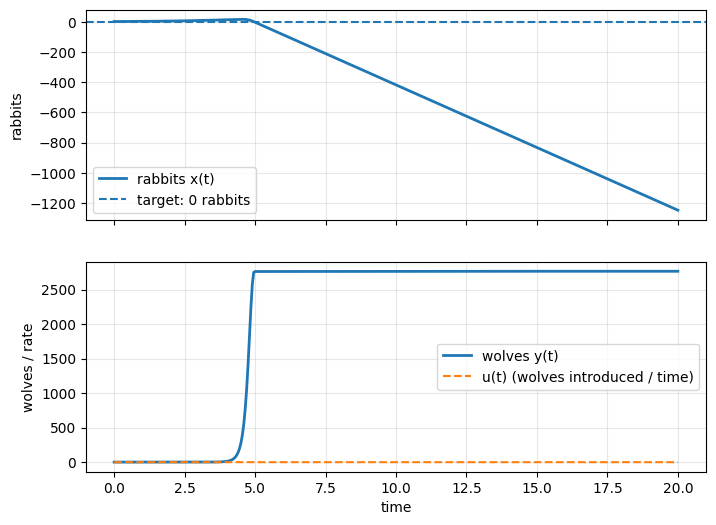

In [26]:
@dataclass
class params:
    a: float = 0.5 #rabbit population growth 
    b: float = 0.03 #wolf prediatation
    c: float = 0.4 # wolf death 
    d: float = 0.4 #wolf reproduction from eating rabbits
    umax: float = 0.8 # MAX wolves introduced per unit time

p = params()

def u_rate(t):
    base = 0.5 if (3.0 <= t <= 12) else 0.0
    return np.clip(base, 0.0, p.umax)

def rhs(t,z):
    x,y = z
    x = max(x, 0.0); y = max(y, 0.0)
    u = u_rate(t)
    dx = p.a*x - p.b*y
    dy = -p.c*x + p.d*x*y + u 
    return [dx,dy]

#sim
t0 = 0.0
t1 = 20.0
n = 400
x0 = 2.0
y0 = 1.0
t_eval = np.linspace(t0, t1, n+1)

sol = solve_ivp(rhs, (t0,t1), [x0,y0], t_eval=t_eval,  rtol=1e-8, atol=1e-10)
x,y = sol.y

fig, ax = plt.subplots(2, 1, figsize=(8,6), sharex=True)

# Rabbits + target line
ax[0].plot(t_eval, x, lw=2, label="rabbits x(t)")
ax[0].axhline(0, linestyle="--", label="target: 0 rabbits")
ax[0].set_ylabel("rabbits")
ax[0].legend()
ax[0].grid(alpha=0.3)

# Wolves + control rate
u_vals = np.array([u_rate(t) for t in t_eval])
ax[1].plot(t_eval, y, lw=2, label="wolves y(t)")
ax[1].plot(t_eval, u_vals, lw=1.5, linestyle="--", label="u(t) (wolves introduced / time)")
ax[1].set_xlabel("time")
ax[1].set_ylabel("wolves / rate")
ax[1].legend()
ax[1].grid(alpha=0.3)




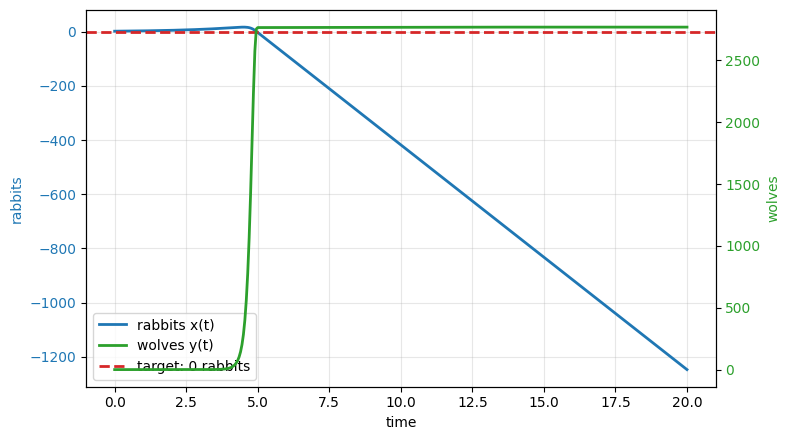

In [28]:
# Optional: keep wolves nonnegative for clarity
y_plot = np.maximum(y, 0.0)

fig, ax1 = plt.subplots(figsize=(8,4.5))

# Rabbits (blue) + target line (red dashed)
r1, = ax1.plot(t_eval, x, color="tab:blue", lw=2, label="rabbits x(t)")
tgt = ax1.axhline(0, color="tab:red", linestyle="--", lw=2, label="target: 0 rabbits")
ax1.set_xlabel("time")
ax1.set_ylabel("rabbits", color="tab:blue")
ax1.tick_params(axis="y", labelcolor="tab:blue")
ax1.grid(alpha=0.3)

# Wolves on secondary axis (green)
ax2 = ax1.twinx()
r2, = ax2.plot(t_eval, y_plot, color="tab:green", lw=2, label="wolves y(t)")
ax2.set_ylabel("wolves", color="tab:green")
ax2.tick_params(axis="y", labelcolor="tab:green")

# Combined legend
lines = [r1, r2, tgt]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc="best")

plt.tight_layout()
plt.show()


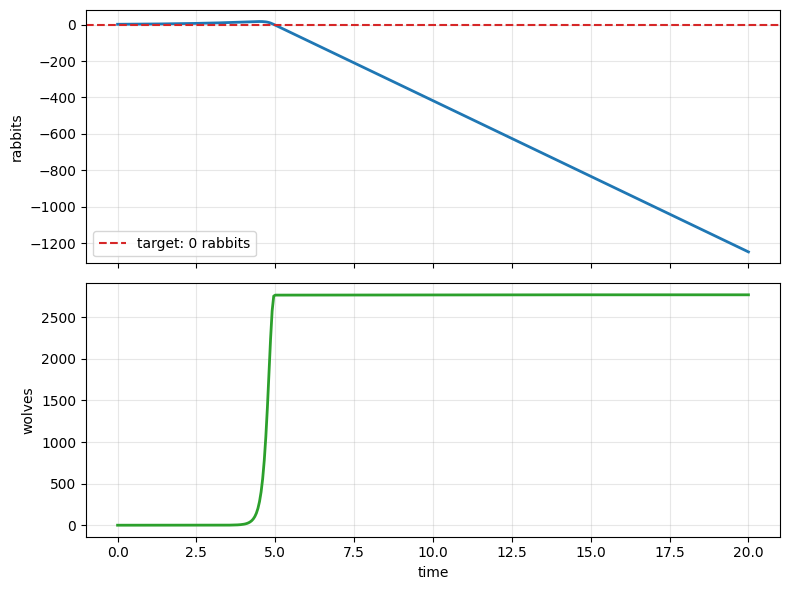

In [27]:
prfig, (ax_r, ax_w) = plt.subplots(2, 1, figsize=(8,6), sharex=True)

ax_r.plot(t_eval, x, lw=2, color="tab:blue")
ax_r.axhline(0, ls="--", color="tab:red", label="target: 0 rabbits")
ax_r.set_ylabel("rabbits")
ax_r.legend(); ax_r.grid(alpha=0.3)

ax_w.plot(t_eval, y, lw=2, color="tab:green")
ax_w.set_xlabel("time"); ax_w.set_ylabel("wolves")
ax_w.grid(alpha=0.3)

plt.tight_layout(); plt.show()

